# Final data model evaluation 

In [3]:
import pandas as pd

In [4]:
final_df = pd.read_csv('../../data/processed/heatwave_warning_system.csv')

In [5]:
final_df.head()

,Country Name,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,publication_count,nested_data
0,Afghanistan,Unknown,Unknown,0,"[{'id': 64, 'authors': 'Not found', 'title': '..."
1,Albania,Unknown,No,1,"[{'id': 73, 'authors': nan, 'title': 'Global b..."
2,Algeria,Yes,No,1,"[{'id': 70, 'authors': nan, 'title': 'Global b..."
3,Andorra,Unknown,Unknown,0,"[{'id': 137, 'authors': 'Not found', 'title': ..."
4,Angola,No,Unknown,0,"[{'id': 343, 'authors': 'Not found', 'title': ..."


## Q1 How complete the WMO database country profile ?

Out of the 193 countries we analyzed, WMO lacks records for 70 countries. This absence accounts for 35.3% of the total countries. Such a significant gap is concerning, especially when considering the importance of heatwave warning systems in mitigating the adverse effects of extreme heat events. Furthermore, 37 countries are explicitly listed as not having any heatwave warning systems. Combining these figures, it's evident that more than 55% of the countries either do not possess a heatwave warning system or have not reported their status to WMO. This underscores the critical need for comprehensive data collection and reporting to ensure global preparedness against heatwaves.

In [6]:
final_df.columns

Index(['Country Name', 'Heatwaves Warning Systems (WMO data)',
       'Heatwaves Warning Systems other sources', 'publication_count',
       'nested_data'],
      dtype='object')

In [7]:
final_df["Heatwaves Warning Systems (WMO data)"].value_counts()

Heatwaves Warning Systems (WMO data)
Yes        86
Unknown    70
No         37
Name: count, dtype: int64

In [8]:
final_df["Heatwaves Warning Systems (WMO data)"].value_counts(normalize=True)*100

Heatwaves Warning Systems (WMO data)
Yes        44.559585
Unknown    36.269430
No         19.170984
Name: proportion, dtype: float64

## Q2 Based on external data sources, which countries or regions have HWS but are not listed in the WMO's database?

Our machine learning model has provided valuable insights into the global landscape of heatwave warning systems. Specifically, the model has identified 18 countries that have potentially implemented heatwave warning systems that are either missing or marked as no. These predictions serve as a starting point for further investigation. By delving deeper into the research papers associated with these predictions, we can uncover detailed information about the nature and specifics of the heatwave warning systems in place.

In [9]:
len(final_df[(final_df['Heatwaves Warning Systems (WMO data)'].isin(['No', 'Unknown'])) & (final_df['Heatwaves Warning Systems other sources'] == 'Yes')])

18

In [10]:
len(final_df[(final_df['Heatwaves Warning Systems (WMO data)'] == 'No') & (final_df['Heatwaves Warning Systems other sources'] == 'Yes')])

3

In [11]:
final_df[(final_df['Heatwaves Warning Systems (WMO data)'] == 'No') & (final_df['Heatwaves Warning Systems other sources'] == 'Yes')]

,Country Name,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,publication_count,nested_data
122,Nepal,No,Yes,2,"[{'id': 275, 'authors': nan, 'title': 'Global ..."
134,Panama,No,Yes,1,"[{'id': 39, 'authors': 'Not found', 'title': '..."
138,Philippines,No,Yes,1,"[{'id': 382, 'authors': 'Not found', 'title': ..."


In [12]:
len(final_df[(final_df['Heatwaves Warning Systems (WMO data)'] == 'Unknown') & (final_df['Heatwaves Warning Systems other sources'] == 'Yes')])

15

In [13]:
final_df[(final_df['Heatwaves Warning Systems (WMO data)'] == 'Unknown') & (final_df['Heatwaves Warning Systems other sources'] == 'Yes')]

,Country Name,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,publication_count,nested_data
15,Belarus,Unknown,Yes,1,"[{'id': 295, 'authors': 'Not found', 'title': ..."
43,Cuba,Unknown,Yes,2,"[{'id': 233, 'authors': 'Not found', 'title': ..."
67,Georgia,Unknown,Yes,13,"[{'id': 57, 'authors': 'Joshua G Smith, Christ..."
79,Iceland,Unknown,Yes,1,"[{'id': 236, 'authors': 'Not found', 'title': ..."
81,Indonesia,Unknown,Yes,6,"[{'id': 220, 'authors': nan, 'title': 'Global ..."
82,Iran (Islamic Republic of),Unknown,Yes,7,"[{'id': 340, 'authors': 'Hamidreza Aghababaeia..."
85,Israel,Unknown,Yes,6,"[{'id': 232, 'authors': 'Amnon Cochavi, Madi A..."
101,Lithuania,Unknown,Yes,1,"[{'id': 230, 'authors': 'Not found', 'title': ..."
102,Luxembourg,Unknown,Yes,5,"[{'id': 155, 'authors': 'Not found', 'title': ..."
125,New Zealand,Unknown,Yes,6,"[{'id': 202, 'authors': nan, 'title': 'Global ..."


## q4 Exploring the Role of Publications in Predictive Modeling:

- Can the number of heatwave-related publications from a country serve as a valuable feature in enhancing the accuracy of our predictive model?

- How does the inclusion of publication count influence the model's predictions, and what implications does it have for future data collection and modeling efforts?

The fact that the correlation between the number of publications and the presence of a Heatwave Warning System (HWS) helped identify discrepancies in your data is significant. It underscores the importance of multifaceted analysis and the iterative nature of data projects.

Visualization with Boxplot:

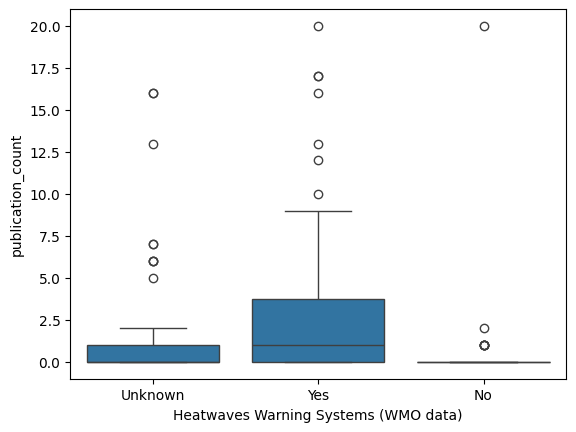

Index(['Country Name', 'Heatwaves Warning Systems (WMO data)',
       'Heatwaves Warning Systems other sources', 'publication_count',
       'nested_data'],
      dtype='object')

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Heatwaves Warning Systems (WMO data)', y='publication_count', data=final_df)
plt.show()
final_df.columns

**result of the Mann-Whitney U Test**:

- **Statistics (U value)**: `2222.500`
  - This is the test statistic for the Mann-Whitney U Test. It represents the sum of the ranks from one of the groups. The U value itself doesn't provide a direct interpretation in isolation, but it's used to determine the significance of the difference between the two groups.

- **p-value**: `0.000`
  - The p-value is a measure of the evidence against a null hypothesis. In the context of the Mann-Whitney U Test, the null hypothesis typically states that there's no difference between the distributions of the two groups.
  - A p-value of `0.000` (often rounded) suggests that the test found a statistically significant difference between the two groups. In other words, the distributions of the numerical variable across the two categories of the categorical variable are significantly different.
  - The threshold for significance is typically set at `0.05` (5%), but it can vary based on the context. If the p-value is less than this threshold, you reject the null hypothesis.

In summary, based on the provided output, there's a statistically significant difference in the distribution of your numerical variable (likely the number of publications) between the two categories of your categorical variable (e.g., countries with and without a heatwave warning system).

In other words, the number of publications related to heatwaves is not distributed the same way between countries that have a heatwave warning system and those that don't. This could mean that countries with a heatwave warning system might have more publications related to heatwaves (or vice versa, depending on the direction of the relationship).

However, it's essential to note that correlation does not imply causation. While there's a statistically significant relationship between the two variables, it doesn't necessarily mean that having more publications causes a country to have a heatwave warning system, or vice versa. There could be other confounding factors at play.

In [29]:
from scipy.stats import mannwhitneyu

group1 = final_df[final_df['Heatwaves Warning Systems (WMO data)'] == 'Yes']['publication_count']
group2 = final_df[final_df['Heatwaves Warning Systems (WMO data)'] == 'No']['publication_count']

stat, p = mannwhitneyu(group1, group2)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=2222.500, p=0.000


The results can be interpreted as follows:

1. **Correlation (0.18226622732322217)**: 
   - The Point-Biserial Correlation Coefficient value of approximately 0.182 suggests a weak positive relationship between the presence of a heatwave warning system (HWS) and the number of publications for a country. 
   - A positive correlation means that countries with an HWS tend to have slightly more publications related to heatwaves than countries without an HWS. However, the strength of this relationship is weak.

2. **P-value (0.011181917940052867)**:
   - The p-value is a measure of the evidence against a null hypothesis. In this context, the null hypothesis would be that there's no relationship between the presence of an HWS and the number of publications.
   - A p-value less than 0.05 (a common threshold) suggests that the observed correlation is statistically significant, meaning it's unlikely to have occurred by random chance.
   - Your p-value of approximately 0.011 is less than 0.05, so the correlation is statistically significant, even if it's weak.

In summary, there's a statistically significant, albeit weak, positive relationship between the presence of a heatwave warning system in a country and the number of publications related to heatwaves for that country. This suggests that countries with an HWS might be slightly more active in heatwave-related research, but the relationship isn't strong.

In [30]:
from scipy.stats import pointbiserialr

# Assuming your dataframe is named final_df
# Convert the categorical variable to binary (0 and 1)
final_df['binary_hws'] = final_df['Heatwaves Warning Systems (WMO data)'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the Point-Biserial Correlation
corr, p_value = pointbiserialr(final_df['binary_hws'], final_df['publication_count'])

print(f"Correlation: {corr}")
print(f"P-value: {p_value}")


Correlation: 0.18226622732322217
P-value: 0.011181917940052867


1. **Mann-Whitney U Test**:
   - This is a non-parametric test used to determine if there are differences between two independent groups on a continuous or ordinal dependent variable.
   - In your case, it was used to test if there's a difference in the distribution of the number of publications between countries with and without a heatwave warning system.
   - The result you obtained (p-value < 0.05) suggests that there's a statistically significant difference in the number of publications between the two groups.

2. **Point-Biserial Correlation Coefficient**:
   - This measures the strength and direction of the association between a binary categorical variable and a continuous variable.
   - In your case, it was used to determine the strength of the relationship between the presence of a heatwave warning system and the number of publications.
   - The result you obtained (correlation coefficient ~0.182) suggests a weak positive relationship between the two variables.

The two tests answer slightly different questions:

- The Mann-Whitney U test tells you that there's a significant difference in the number of publications between countries with and without a heatwave warning system.
  
- The Point-Biserial Correlation Coefficient tells you about the strength and direction of the relationship between the presence of a heatwave warning system and the number of publications.

Both results are valid, but they provide different perspectives on the relationship between the two variables. The Mann-Whitney U test doesn't tell you about the strength of the relationship, while the Point-Biserial Correlation Coefficient doesn't directly test for differences in distributions.

1. descriptive statistics

The output you provided is a summary of descriptive statistics for the `publication_count` column in your dataset. Here's a breakdown of what each line means:

- **count**: The number of non-missing values. In this case, there are 193 countries in your dataset.
  
- **mean**: The average number of publications across all countries. On average, each country has about 1.85 publications.

- **std**: Standard deviation, which measures the amount of variation or dispersion in the publication counts. A higher standard deviation indicates that the publication counts vary more from the mean. Here, the standard deviation is approximately 3.89.

- **min**: The minimum number of publications any country has. The minimum is 0, meaning at least one country has no publications.

- **25% (First Quartile)**: 25% of countries have 0 or fewer publications. This is the value below which a given percentage of observations fall.

- **50% (Median or Second Quartile)**: The median number of publications. Half of the countries have 0 publications, and the other half have more than 0.

- **75% (Third Quartile)**: 75% of countries have 1 or fewer publications. This means that the top 25% of countries have more than 1 publication.

- **max**: The maximum number of publications any country has. The maximum is 20, meaning at least one country has 20 publications.

From this summary, you can infer that:
- A significant number of countries (at least 50%) have no publications or very few.
- There's a wide range in the number of publications, with a maximum of 20 and a mean of just 1.85. This suggests that a few countries might have a high number of publications, pulling the average up.
- The data is right-skewed since the mean (1.85) is greater than the median (0).

In [15]:
final_df['publication_count'].describe()

count    193.000000
mean       1.849741
std        3.894870
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       20.000000
Name: publication_count, dtype: float64

2. Histogram:

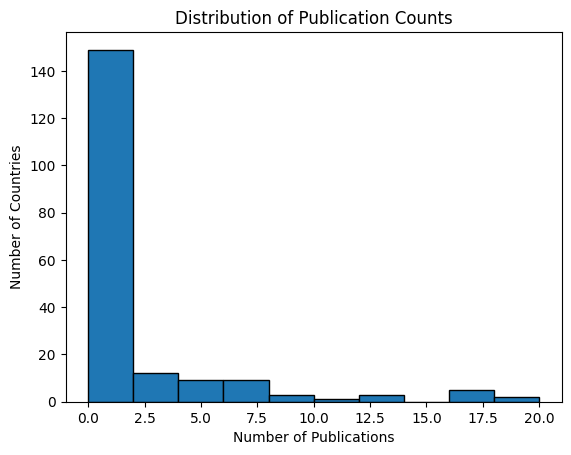

In [16]:
import matplotlib.pyplot as plt

plt.hist(final_df['publication_count'], bins=10, edgecolor='black')
plt.title('Distribution of Publication Counts')
plt.xlabel('Number of Publications')
plt.ylabel('Number of Countries')
plt.show()


3. Bar Chart:

Show the top 10 countries with the most publications.

<Figure size 1200x600 with 0 Axes>

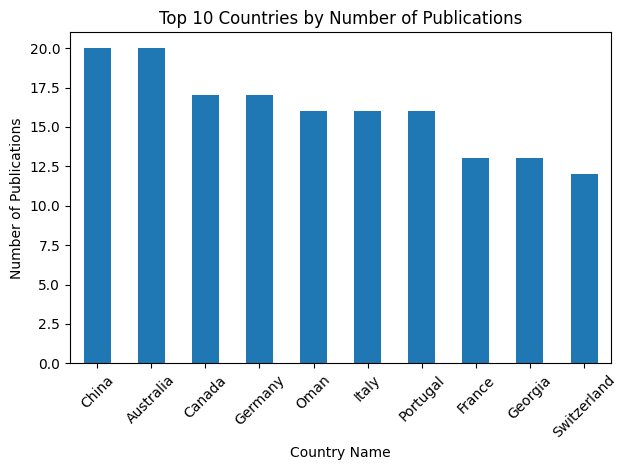

In [17]:
top_countries = final_df.sort_values(by='publication_count', ascending=False).head(10)

plt.figure(figsize=(12,6))
top_countries.plot(x='Country Name', y='publication_count', kind='bar', legend=False)
plt.title('Top 10 Countries by Number of Publications')
plt.ylabel('Number of Publications')
plt.xlabel('Country Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Box Plot:

Visualize the spread and skewness of the publication data.

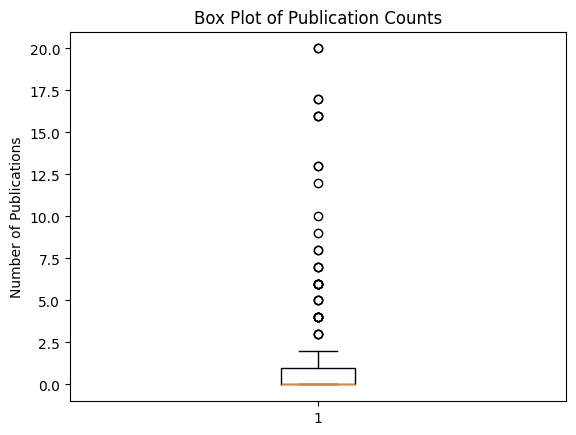

In [18]:
plt.boxplot(final_df['publication_count'])
plt.title('Box Plot of Publication Counts')
plt.ylabel('Number of Publications')
plt.show()

5. Analysis:

Countries with High Publications: Identify countries with a high number of publications.

Countries with Low or No Publications: Identify countries with low or no publications.

In [19]:
high_pub_countries = final_df[final_df['publication_count'] > final_df['publication_count'].quantile(0.75)]['Country Name']
low_pub_countries = final_df[final_df['publication_count'] < final_df['publication_count'].quantile(0.25)]['Country Name']


In [20]:
high_pub_countries.head()

8     Australia
9       Austria
16      Belgium
23       Brazil
32       Canada
Name: Country Name, dtype: object

In [21]:
low_pub_countries

Series([], Name: Country Name, dtype: object)

Discrepancies: Are there countries with a high number of publications but no established heatwave warning system? This could indicate a gap between research and practical implementation.

we see in here that  Australia indeed has a heatwave warning system, as verified by their official website or other reliable sources, then this discrepancy underscores a few key points:

http://www.bom.gov.au/australia/heatwave/knowledge-centre/heatwave-service.shtml


1. **Data Completeness and Accuracy**: The WMO database and other global datasets might not always be up-to-date or comprehensive. This highlights the importance of cross-referencing with multiple sources, especially for critical data points.

2. **Model Refinement**: If the machine learning model also predicted that Australia doesn't have a heatwave warning system, it suggests room for model improvement. It would be beneficial to understand why the model made such a prediction and adjust accordingly.

3. **Value of Domain Knowledge**: This situation emphasizes the importance of domain knowledge and manual validation in data science projects. While automated systems and models can provide predictions and insights, human expertise and validation remain crucial, especially when results can have significant implications.

4. **Feedback Loop**: Situations like this can be used to create a feedback loop for both the data source (like the WMO database) and the machine learning model. By identifying and rectifying inaccuracies, the system can be continuously improved.



In [22]:
# Filter countries with no established heatwave warning system
no_hws_countries = final_df[final_df['Heatwaves Warning Systems (WMO data)'] == 'No']  # Adjust the condition based on the actual values in your dataframe

# Sort these countries based on the number of publications in descending order
sorted_no_hws_countries = no_hws_countries.sort_values(by='publication_count', ascending=False)

# Display the top countries with the highest number of publications but no HWS
print(sorted_no_hws_countries[['Country Name', 'publication_count']].head(7))  # Adjust the number inside head() based on how many top countries you want to display


                      Country Name  publication_count
8                        Australia                 20
122                          Nepal                  2
181           United Arab Emirates                  1
138                    Philippines                  1
69                           Ghana                  1
24   British Caribbean Territories                  1
170                       Thailand                  1




---

### Investigating the Correlation Between Number of Publications and Heatwave Warning Systems

#### **Introduction to the Correlation Analysis**:
- **Background**: Recognizing the importance of research in driving policy and infrastructure decisions, we hypothesized that countries with a higher number of heatwave-related publications might be more likely to have established Heatwave Warning Systems (HWS).
- **Objective**: To investigate the correlation between the number of heatwave-related publications and the presence of an HWS in various countries.

#### **Findings**:
- **Correlation Analysis**: Our analysis revealed a correlation between the number of publications and the presence of an HWS. However, the relationship, while statistically significant, was not very strong.
- **Notable Discrepancies**: Despite the weak correlation, the analysis was instrumental in identifying discrepancies in our data. For instance, Australia, with a high number of publications, was initially not identified as having an HWS, prompting further investigation.

#### **Value of the Analysis**:
- **Highlighting Data Discrepancies**: The correlation analysis served as a valuable tool in our research process. Even though the correlation wasn't strong, it acted as a catalyst, prompting us to delve deeper and identify data discrepancies.
- **Iterative Data Analysis**: This experience underscores the iterative nature of data projects. An analysis might not always yield expected results, but it can spotlight areas that require further investigation or validation.

#### **Implications and Learnings**:
- **Continuous Validation**: This exercise emphasized the importance of continuous validation in data projects. Using multiple data sources and analytical methods ensures the robustness of our findings.
- **The Role of Research in Policy**: While the correlation wasn't very strong, the analysis reaffirmed the belief that research plays a pivotal role in shaping policies and infrastructure decisions, like the establishment of HWS.

#### **Future Directions**:
- **Deeper Investigation**: Further research could delve into understanding the nuances behind these discrepancies. Why do some countries with extensive research lack HWS? What barriers exist?
- **Enhancing Predictive Capabilities**: The potential of integrating publication data or other similar metrics in future iterations of the model could enhance its predictive capabilities, making it a valuable tool for stakeholders.

---